# 1. Perkenalan Dataset

Pada tahap awal, dilakukanlah Exploratory Data Analysis (EDA) pada dataset dari Kaggle yang berjudul Brazilian E-Commerce [link ke dataset kaggle]((https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

Dalam proses EDA tersebut, dilakukan beberapa langkah penting untuk memastikan dataset siap digunakan dalam tahap clustering, antara lain:

Data Wrangling:
- Gathering Data, Assesing Data, Cleaning Data

Mengeksplorasi dataset untuk memahami:
- distribusi data, korelasi antar fitur, dan karakteristik lain yang dapat memberikan insight lebih lanjut.

Setelah tahap pembersihan dan eksplorasi selesai, saya menggabungkan data tersebut menjadi satu file akhir yang disebut **final_dataset.csv,** yang siap untuk dilanjutkan ke tahap clustering.



Di tahap ini, dataset final_dataset.csv **tidak berisi pengelompokan atau clustering data**; proses yang dilakukan hanya merapikan, membersihkan, dan menyatukan tabel agar lebih mudah dianalisis lebih lanjut.

Untuk rincian lebih lanjut mengenai analisis dan proses yang saya lakukan, Anda dapat melihat notebook yang saya buat di GitHub: [Exploratory Data Analysis E-Commerce.](https://github.com/yoshioakio/Products-Analysis/blob/main/Exploratory_Data_Analysis_E_Commerce.ipynb)

# 2. Import Library

liblary python yang digunkaan untuk analisis data dan pembangunan model machine learning clustering ini.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# 3. Memuat Dataset

In [2]:
ecoms_df = pd.read_csv("dataset/final_dataset.csv")
ecoms_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00.000000000,2018-08-07 15:27:45.000,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08 00:00:00,2018-08-08 18:37:50,31570,belo horizonte,SP,1,boleto,1,141.46,perfumery
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00.000000000,2018-08-17 18:06:29.000,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-18 00:00:00,2018-08-22 19:07:58,14840,guariba,SP,1,credit_card,3,179.12,auto
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59.000000000,2017-12-02 00:28:42.000,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-12-03 00:00:00,2017-12-05 19:21:58,31842,belo horizonte,MG,1,credit_card,1,72.20,pet_shop
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-19 18:38:06.321779509,2017-05-22 10:07:46.000000000,2017-05-26 12:55:51.000,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,...,2017-05-27 00:00:00,2017-05-28 02:59:57,12940,atibaia,SP,1,credit_card,3,75.16,auto
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-26 23:56:45.321779509,2017-01-26 14:16:31.000000000,2017-02-02 14:08:10.000,2017-03-06 00:00:00,1,ac1789e492dcd698c5c10b97a671243a,...,2017-02-03 00:00:00,2017-02-05 01:58:35,13720,sao jose do rio pardo,SP,1,boleto,1,35.95,furniture_decor


# 4. Exploratory Data Analysis (EDA)

Pada tahap ini, Anda akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset ecoms_df (final_dataset.csv)

## a. Memahami Struktur Data

- Meninjau jumlah baris dan kolom dalam dataset.

In [3]:
ecoms_df.shape

(58836, 36)

- Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [4]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58836 entries, 0 to 58835
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58836 non-null  object 
 1   customer_id                    58836 non-null  object 
 2   order_status                   58836 non-null  object 
 3   order_purchase_timestamp       58836 non-null  object 
 4   order_approved_at              58836 non-null  object 
 5   order_delivered_carrier_date   58836 non-null  object 
 6   order_delivered_customer_date  58836 non-null  object 
 7   order_estimated_delivery_date  58836 non-null  object 
 8   order_item_id                  58836 non-null  int64  
 9   product_id                     58836 non-null  object 
 10  seller_id                      58836 non-null  object 
 11  shipping_limit_date            58836 non-null  object 
 12  price                          58836 non-null 

## b. Menangani Data yang Hilang

- Meidentifikasi dan analisis data yang hilang (missing values).

In [5]:
ecoms_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
order_purchase_year              0
order_purchase_month             0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
seller_zip_code_pref

In [6]:
print("Jumlah duplikasi: ", ecoms_df.duplicated().sum())

Jumlah duplikasi:  0


## c. Merapihkan data

Dikarenakan Jumlah Kolom/Fitur data lumayan banyak,keputusan terbaik akan dilakukan pemilihan kolom/fitur yang relavan dan sesuai dengan tujuan analisis ini

#### 1. Menghapus beberapa kolom/fitur yang tidak relavan untuk analisis ini

In [7]:
ecoms_df.drop(columns=[
    'seller_id','order_approved_at', 'order_delivered_carrier_date',
    'shipping_limit_date', 'product_category_name',
    'seller_zip_code_prefix', 'seller_city', 'seller_state',
    'payment_type', 'payment_value'
], inplace=True)

In [8]:
ecoms_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_installments,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45.000,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,...,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50,1,1,perfumery
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29.000,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,...,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00,2018-08-22 19:07:58,1,3,auto
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42.000,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,...,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03 00:00:00,2017-12-05 19:21:58,1,1,pet_shop
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-26 12:55:51.000,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,59.99,15.17,...,16.0,16.0,17.0,07d67dd06ed5f88bef11ef6b464e79ae,5,2017-05-27 00:00:00,2017-05-28 02:59:57,1,3,auto
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-02-02 14:08:10.000,2017-03-06 00:00:00,1,ac1789e492dcd698c5c10b97a671243a,19.90,16.05,...,35.0,35.0,15.0,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1,2017-02-03 00:00:00,2017-02-05 01:58:35,1,1,furniture_decor


#### 2. Mengubah kolom tanggal menjadi tipe datetime.

In [9]:
ecoms_df['order_purchase_timestamp'] = pd.to_datetime(ecoms_df['order_purchase_timestamp'])
ecoms_df['order_delivered_customer_date'] = pd.to_datetime(ecoms_df['order_delivered_customer_date'])
ecoms_df['order_estimated_delivery_date'] = pd.to_datetime(ecoms_df['order_estimated_delivery_date'])
ecoms_df['review_creation_date'] = pd.to_datetime(ecoms_df['review_creation_date'], format='%Y-%m-%d', errors='coerce')
ecoms_df['review_answer_timestamp'] = pd.to_datetime(ecoms_df['review_answer_timestamp'])

In [10]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58836 entries, 0 to 58835
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       58836 non-null  object        
 1   customer_id                    58836 non-null  object        
 2   order_status                   58836 non-null  object        
 3   order_purchase_timestamp       58836 non-null  datetime64[ns]
 4   order_delivered_customer_date  58836 non-null  datetime64[ns]
 5   order_estimated_delivery_date  58836 non-null  datetime64[ns]
 6   order_item_id                  58836 non-null  int64         
 7   product_id                     58836 non-null  object        
 8   price                          58836 non-null  float64       
 9   freight_value                  58836 non-null  float64       
 10  order_purchase_year            58836 non-null  int64         
 11  order_purchase_

#### 3. Menambahkan kolom bulan dan tahun transaksi

In [11]:
ecoms_df['order_purchase_month'] = ecoms_df['order_purchase_timestamp'].dt.month
ecoms_df['order_purchase_year'] = ecoms_df['order_purchase_timestamp'].dt.year
ecoms_df['order_purchase_date'] = ecoms_df['order_purchase_year'].astype(str) + '-' + ecoms_df['order_purchase_month'].astype(str).str.zfill(2)

#### 4. Menghitung durasi pengiriman (dalam hari)

In [12]:
ecoms_df['shipping_duration_days'] = (
    ecoms_df['order_delivered_customer_date'] - ecoms_df['order_purchase_timestamp']
).dt.days

#### 5. Menghitung akurasi pengiriman (lebih cepat atau lambat dari estimasi)

In [13]:
ecoms_df['delivery_accuracy_days'] = (
    ecoms_df['order_estimated_delivery_date'] - ecoms_df['order_delivered_customer_date']
).dt.days

#### 6. Menghitung Durasi Review

In [14]:
ecoms_df['review_answer_duration_days'] = (
    ecoms_df['review_answer_timestamp'] - ecoms_df['review_creation_date']
).dt.days.fillna(0).astype(int)

#### 7. Menghitung Jumlah Status Pembayaran Yang Sudah

In [15]:
ecoms_df['payment_made'] = (
    ecoms_df['payment_installments'] - ecoms_df['payment_sequential']
).apply(lambda x: 1 if x == 0 else 0)

#### 8. Menghitung kombinasi dimensi berat produk.

In [16]:
ecoms_df['product_volume_cm3'] = (
    (ecoms_df['product_length_cm'] * ecoms_df['product_height_cm'] * ecoms_df['product_width_cm']) / ecoms_df['product_weight_g']
)

#### 9. Menghitung Kombinasi Keterangan Produk

In [17]:
ecoms_df['product_complexity'] = (
    ecoms_df['product_name_lenght'] + ecoms_df['product_description_lenght'] + ecoms_df['product_photos_qty']
)

#### 10. Menampilkan hasil untuk memverifikasi

In [18]:
ecoms_df[['order_purchase_date', 'shipping_duration_days', 'delivery_accuracy_days', 'review_answer_duration_days', 'payment_made', 'product_volume_cm3', 'product_complexity']].head()

,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity
0,2018-07,13,5,0,1,11.732500,208.0
1,2018-08,9,17,0,0,22.800000,279.0
2,2017-11,13,12,0,1,13.333333,530.0
3,2017-05,9,11,0,0,87.040000,1016.0
4,2017-01,9,31,0,1,61.250000,475.0


#### 11. Menghapus kolom yang sudah digabungkan

In [19]:
ecoms_df = ecoms_df.drop(columns=['order_purchase_year','order_purchase_month','order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_weight_g', 'payment_installments', 'payment_sequential', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

In [20]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58836 entries, 0 to 58835
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58836 non-null  object 
 1   customer_id                    58836 non-null  object 
 2   order_status                   58836 non-null  object 
 3   order_item_id                  58836 non-null  int64  
 4   product_id                     58836 non-null  object 
 5   price                          58836 non-null  float64
 6   freight_value                  58836 non-null  float64
 7   review_id                      58836 non-null  object 
 8   review_score                   58836 non-null  int64  
 9   product_category_name_english  58836 non-null  object 
 10  order_purchase_date            58836 non-null  object 
 11  shipping_duration_days         58836 non-null  int64  
 12  delivery_accuracy_days         58836 non-null 

## d. Analisis Distribusi dan Korelasi

- Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi mengunakan histogram dan boxplot.

### 1. Distribusi fitur numerik (histograms)

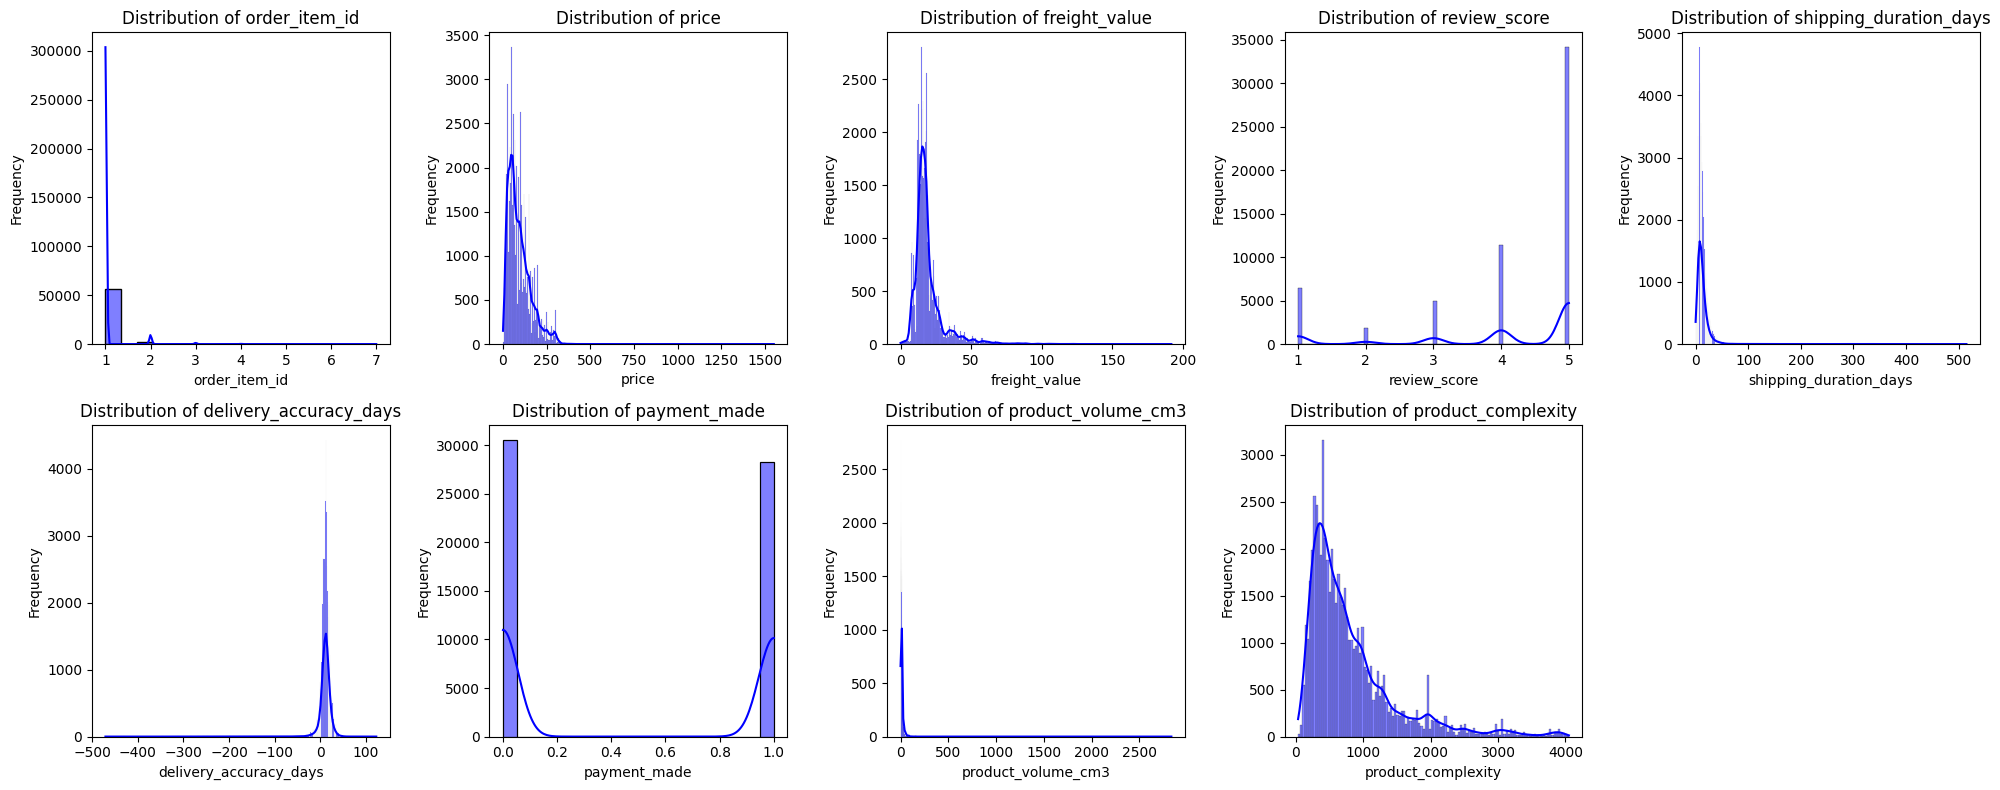

In [21]:
num_features = ecoms_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.histplot(ecoms_df[column], kde=True, color="blue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2. Distribusi fitur numerik (Boxplots)

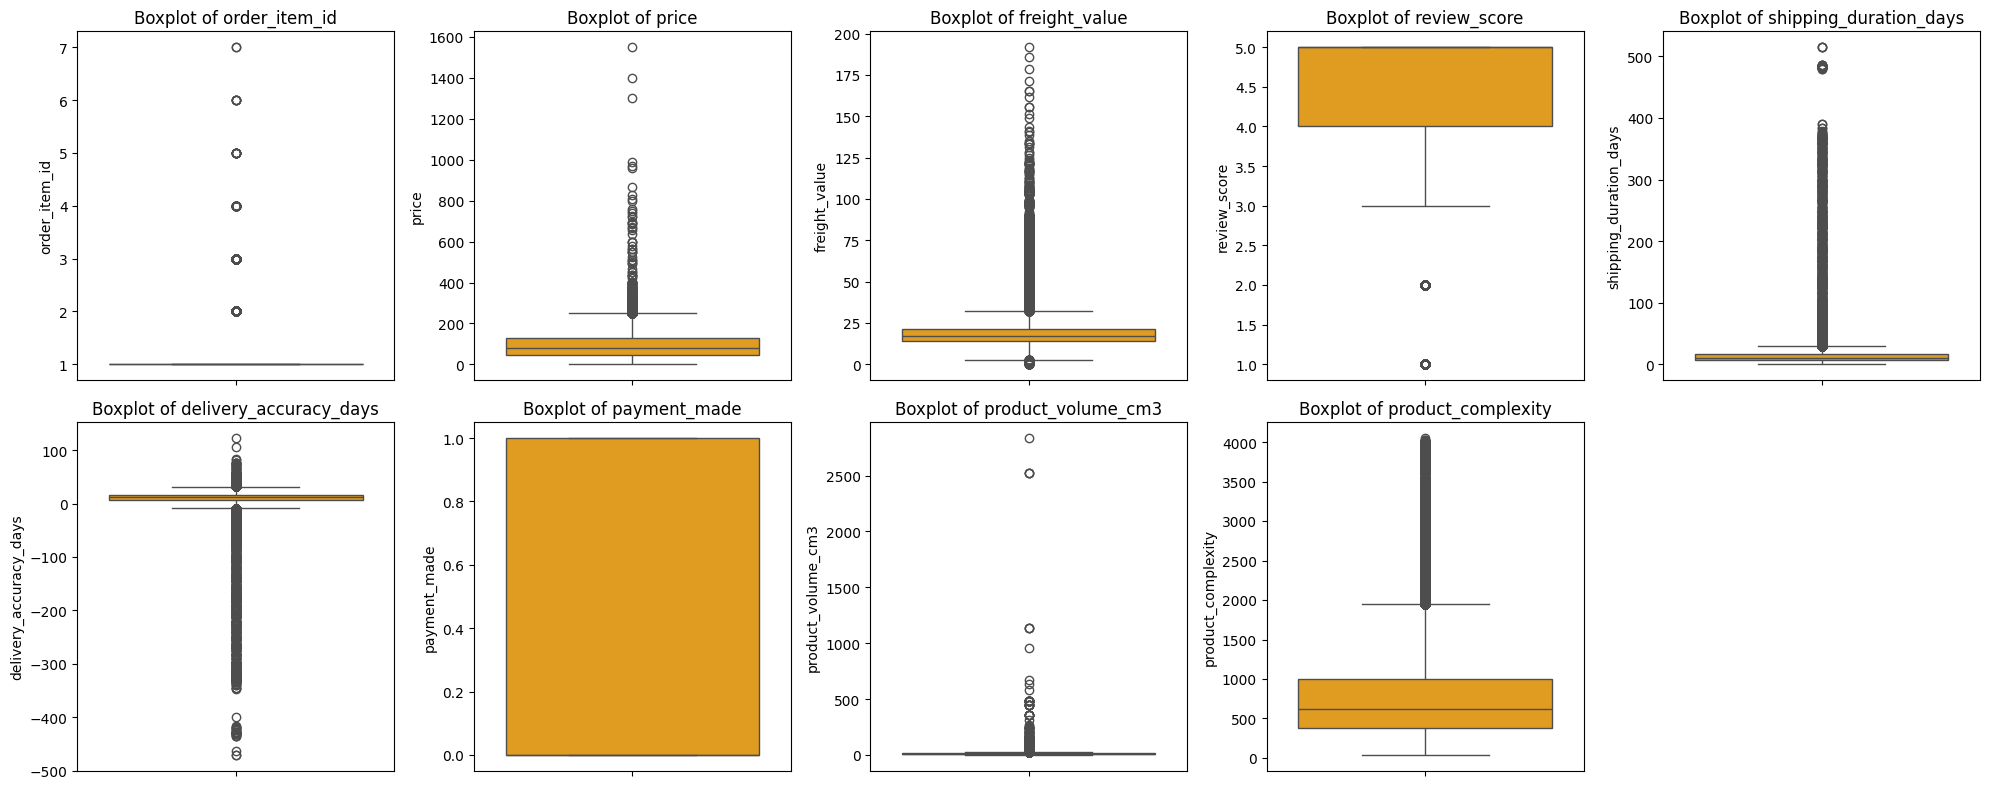

In [22]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.boxplot(data=ecoms_df, y=column, color="orange")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### 3. Pairplot untuk fitur numerik

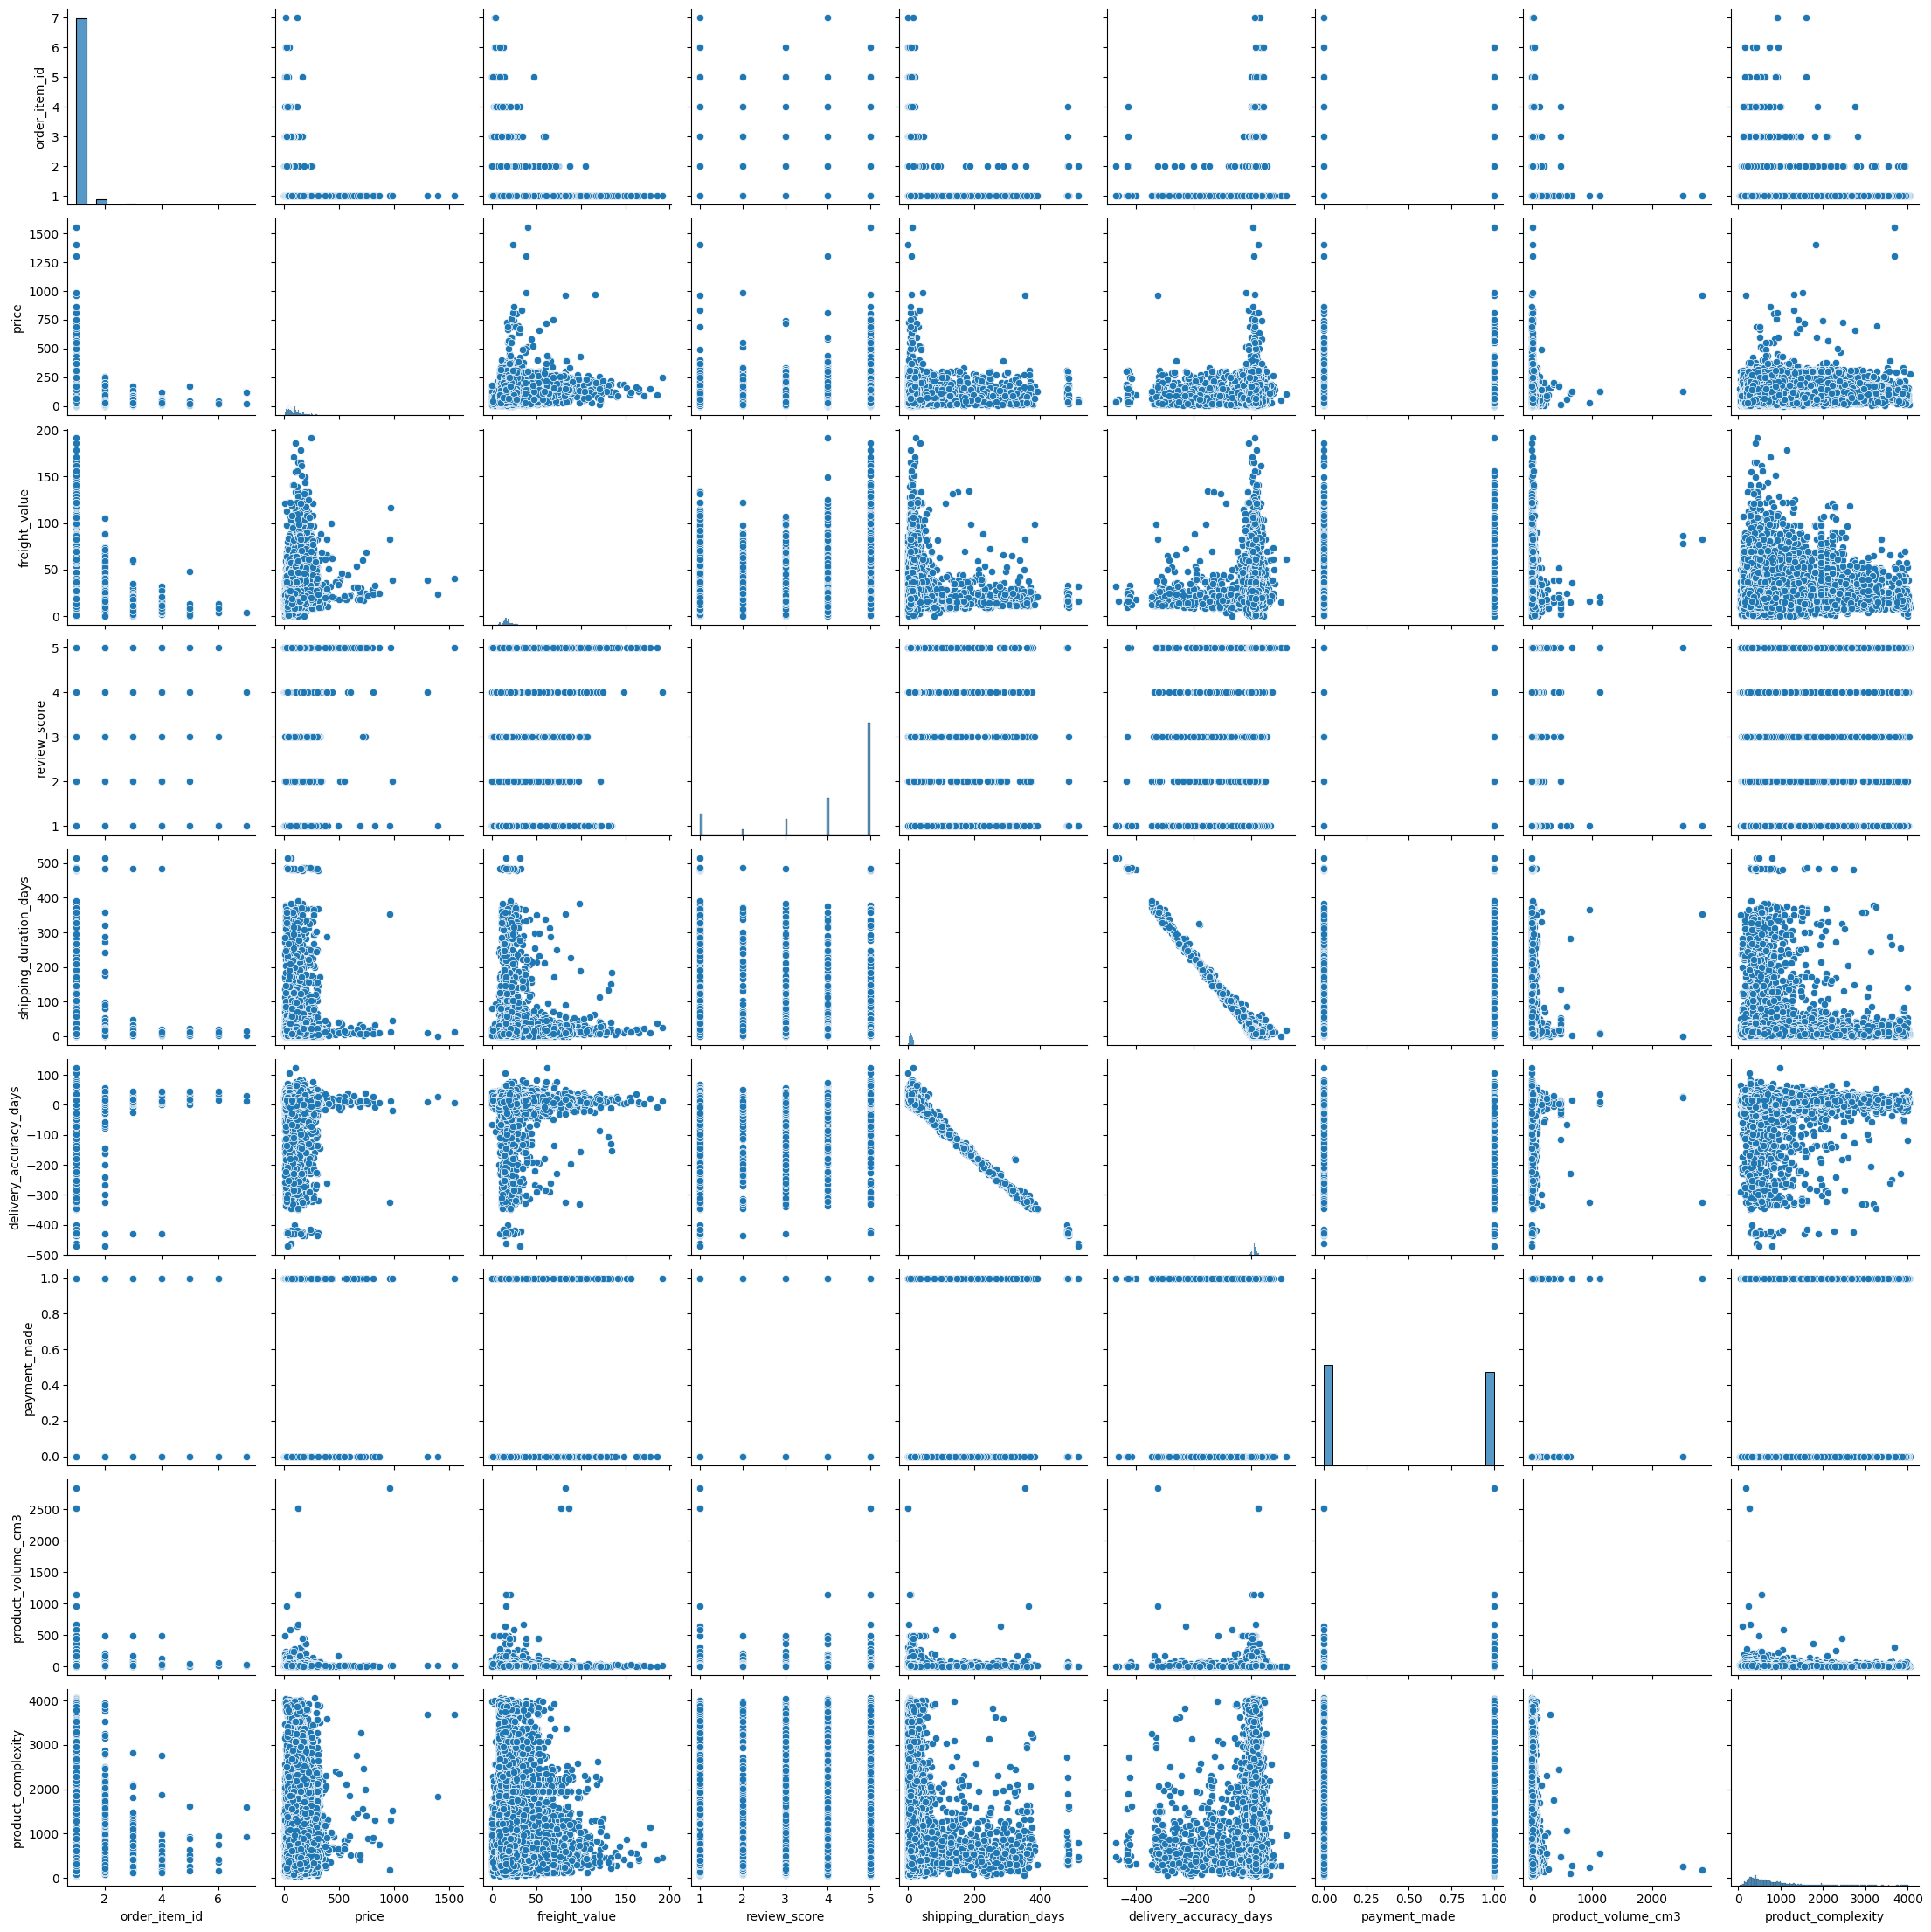

In [23]:
sns.pairplot(ecoms_df[num_features])
plt.show()

## e. Visualisasi Data

### a. Visualisasi dasar grafik distribusi dan diagram batang untuk variabel kategorikal.

- Distribusi fitur kategorikal

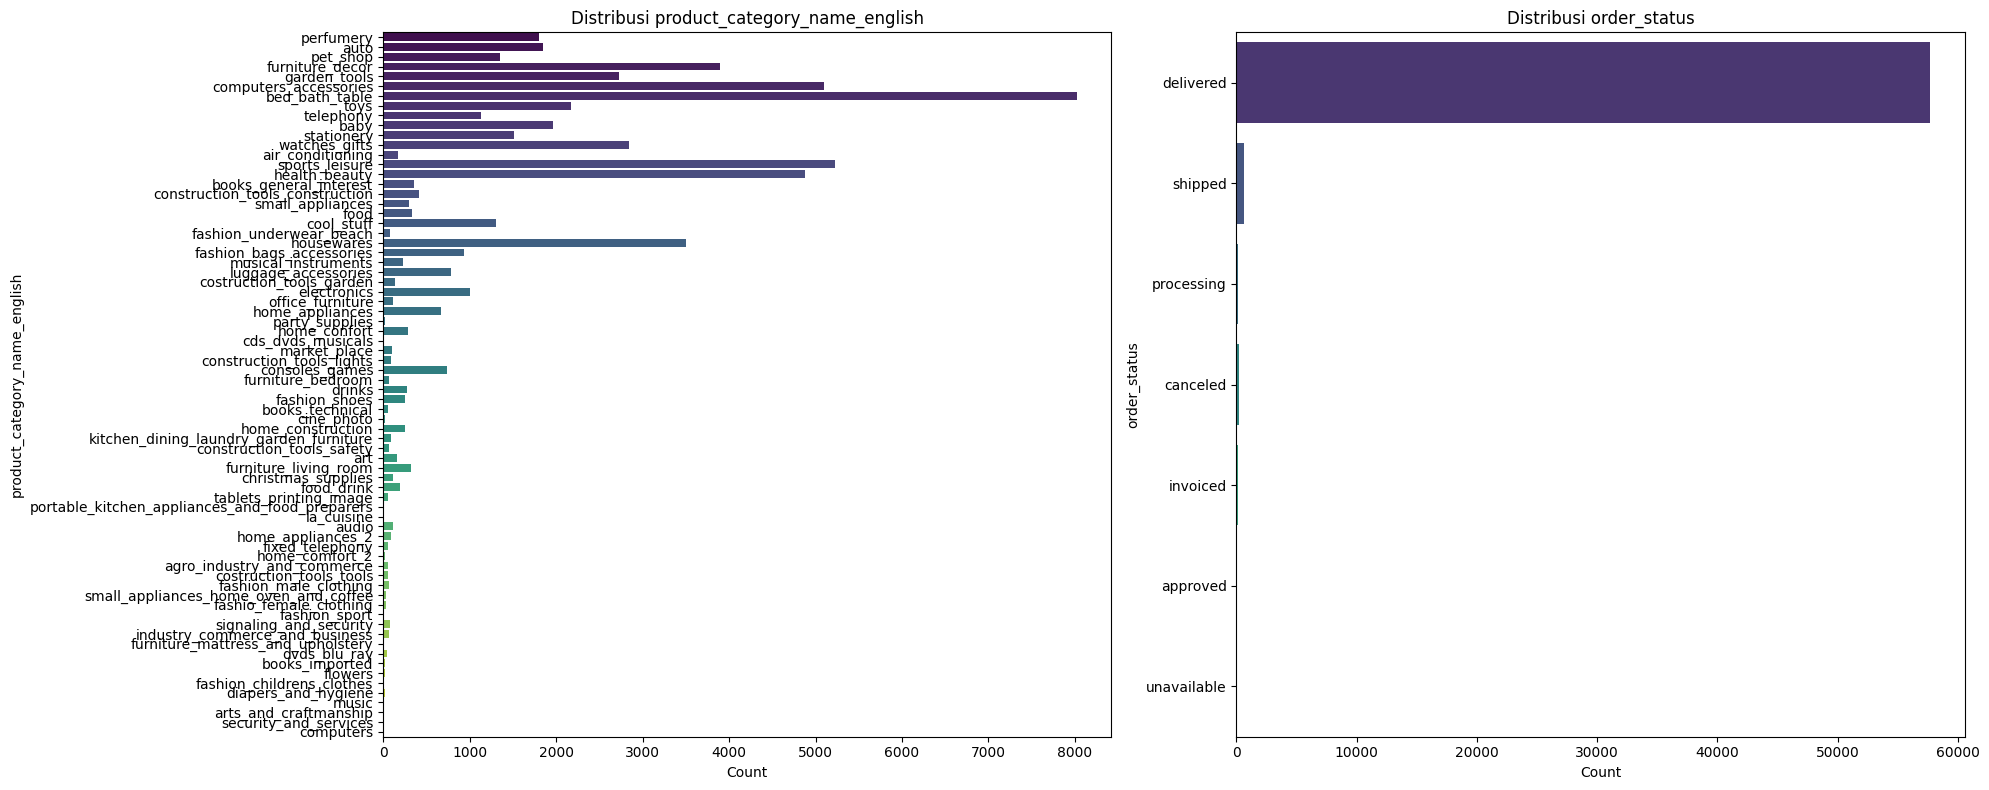

In [24]:
cat_features = ecoms_df[['product_category_name_english', 'order_status']].columns
plt.figure(figsize=(20, 8))
for i, column in enumerate(cat_features, 1):
    plt.subplot(1, len(cat_features), i)
    sns.countplot(y=ecoms_df[column], hue=ecoms_df[column], palette='viridis', legend=False,  dodge=False,)
    plt.title(f'Distribusi {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


Untuk bagian ini, visualisasi kolom bertipe kategorikal (object) hanya dilakukan pada kolom **product_category_name_english.** Hal ini dikarenakan kolom seperti **order_id, product_id, review_id, customer_id, dan order_purchase_date** akan memakan waktu yang cukup lama untuk divisualisasikan.

### b. Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

#### Heatmap korelasi untuk fitur numerik

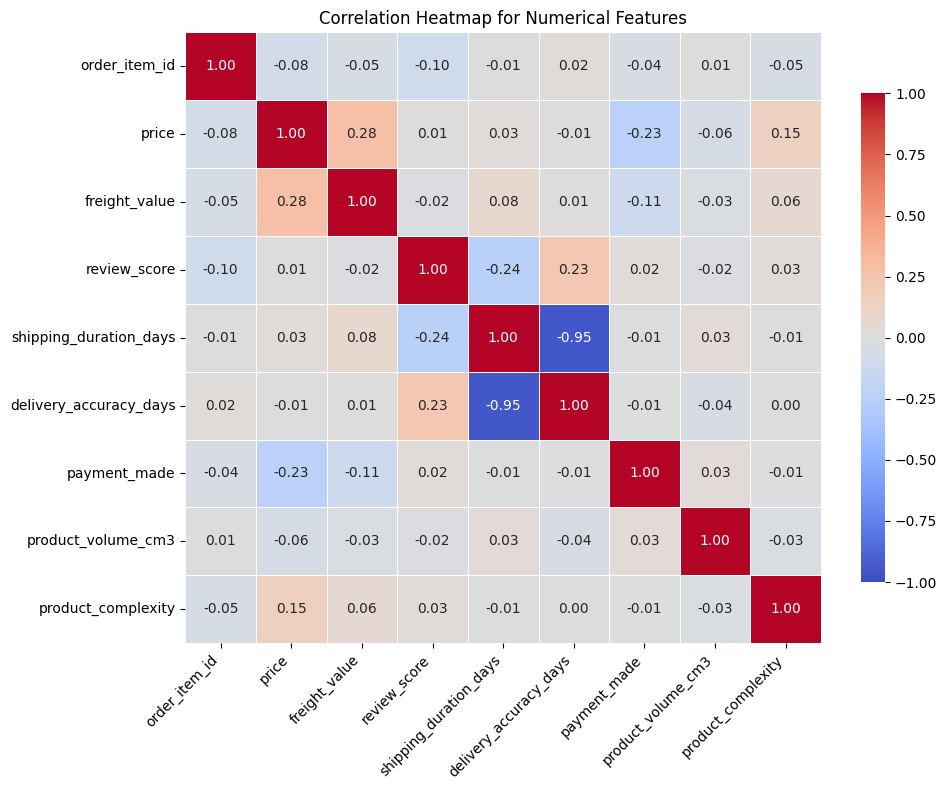

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = ecoms_df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap for Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Data Preprocessing

## a. Menghapus atau Menangani Data Kosong (Missing Values)

In [26]:
ecoms_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
order_purchase_date              0
shipping_duration_days           0
delivery_accuracy_days           0
review_answer_duration_days      0
payment_made                     0
product_volume_cm3               0
product_complexity               0
dtype: int64

Berdasarkan dari pengecekan awal, data set inih tidak ditemukan Missing Value yang berarti data set (ecoms_df) lumayan bagus ✅

## b. Menghapus Data Duplikat

In [27]:
print("Jumlah duplikasi: ", ecoms_df.duplicated().sum())

Jumlah duplikasi:  71


In [28]:
ecoms_df[ecoms_df.duplicated(keep=False)]

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity
175,1d251ab94983c4adb11e4b168abb1439,230ab395e91b2421bd00ea45b60b23cb,delivered,1,fb92dc4602bd9224e0e267496748afc5,219.0,19.41,9ff966b8034d68cdb96a90208a86fd5f,5,watches_gifts,2018-03,8,11,0,0,11.760000,272.0
176,1d251ab94983c4adb11e4b168abb1439,230ab395e91b2421bd00ea45b60b23cb,delivered,1,fb92dc4602bd9224e0e267496748afc5,219.0,19.41,9ff966b8034d68cdb96a90208a86fd5f,5,watches_gifts,2018-03,8,11,0,0,11.760000,272.0
1175,7dc27189eb855013011423a5dcac71c3,848a418025af5ffbbadfdedd85081da7,delivered,1,e2de41d7036bd95cd37a7a9f4949024f,29.9,7.71,6763593c75e88ef9f7205ea179d52ad5,4,construction_tools_construction,2018-04,2,9,0,0,3.520000,271.0
1176,7dc27189eb855013011423a5dcac71c3,848a418025af5ffbbadfdedd85081da7,delivered,1,e2de41d7036bd95cd37a7a9f4949024f,29.9,7.71,6763593c75e88ef9f7205ea179d52ad5,4,construction_tools_construction,2018-04,2,9,0,0,3.520000,271.0
1650,05e6501cdfbd86fe9a3a788c3d411091,a0262fcf5f286681fc96c8d2b8396208,delivered,1,ef703385b2707af7f9af3e185679811c,75.0,13.55,fd4792196a1dd7bb52384ccc54dc8c5e,5,bed_bath_table,2017-10,3,12,0,0,12.096000,379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56890,498c950b1765883c2a104b8dd227ea90,bd1f61fc15cc21dca7ca5f6786ab475b,delivered,1,bacf2de8920bbcaf6f005a30d81391d2,319.0,11.36,8562724d338c820320d5dc3d5dec9a2e,5,perfumery,2018-06,5,7,0,0,11.613306,444.0
57090,1094dc9e3237f4deff27a2bab683a300,bb06fef1b4fca6bcc757a3db68a9daf1,delivered,1,2bb3e85f2a403543fdb64e266e70c792,329.9,87.93,ff31a3324f81c1d435eead45f1026320,2,toys,2017-11,7,11,0,0,5.205656,987.0
57091,1094dc9e3237f4deff27a2bab683a300,bb06fef1b4fca6bcc757a3db68a9daf1,delivered,1,2bb3e85f2a403543fdb64e266e70c792,329.9,87.93,ff31a3324f81c1d435eead45f1026320,2,toys,2017-11,7,11,0,0,5.205656,987.0
57307,a3a38cd51c4d299f206bc73c6daaf2b9,7d68e1861e0a36c2876e702fec92adf0,delivered,1,375478581c97832540b9209722a32058,401.7,50.89,5a94a1d981cc8b2e353237182e6ed060,5,baby,2018-08,3,5,0,0,5.982955,627.0


Keputusan terbaik adalah **menghapus data duplikasi identik sepenuhnya,** mengingat bahwa duplikasi ini muncul akibat penghapusan kolom sebelumnya. Hal ini memastikan bahwa dataset bersih dan representatif tanpa informasi yang berulang, yang dapat memengaruhi hasil clustering.

In [29]:
ecoms_df.drop_duplicates(inplace=True)

In [30]:
print("Jumlah duplikasi setelah penghapusan:", ecoms_df.duplicated().sum())

Jumlah duplikasi setelah penghapusan: 0


In [31]:
print("Jumlah data setelah penghapusan duplikasi:",ecoms_df.shape)

Jumlah data setelah penghapusan duplikasi: (58765, 17)


In [32]:
ecoms_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,perfumery,2018-07,13,5,0,1,11.732500,208.0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,auto,2018-08,9,17,0,0,22.800000,279.0
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,pet_shop,2017-11,13,12,0,1,13.333333,530.0
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,59.99,15.17,07d67dd06ed5f88bef11ef6b464e79ae,5,auto,2017-05,9,11,0,0,87.040000,1016.0
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,19.90,16.05,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1,furniture_decor,2017-01,9,31,0,1,61.250000,475.0


## c. Normalisasi atau Standarisasi Fitur

In [33]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58765 entries, 0 to 58835
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58765 non-null  object 
 1   customer_id                    58765 non-null  object 
 2   order_status                   58765 non-null  object 
 3   order_item_id                  58765 non-null  int64  
 4   product_id                     58765 non-null  object 
 5   price                          58765 non-null  float64
 6   freight_value                  58765 non-null  float64
 7   review_id                      58765 non-null  object 
 8   review_score                   58765 non-null  int64  
 9   product_category_name_english  58765 non-null  object 
 10  order_purchase_date            58765 non-null  object 
 11  shipping_duration_days         58765 non-null  int64  
 12  delivery_accuracy_days         58765 non-null  int6

Normalisasi hanya untuk fitur numerik

In [34]:
all_features = ['price', 'freight_value', 'review_score', 'shipping_duration_days', 'product_complexity', 'delivery_accuracy_days', 'review_answer_duration_days', 'payment_made', 'product_volume_cm3']

scaler = MinMaxScaler()
ecoms_df[all_features] = scaler.fit_transform(ecoms_df[all_features])

In [35]:
ecoms_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.076074,0.118669,8d5266042046a06655c8db133d120ba5,0.75,perfumery,2018-07,0.025243,0.801347,0.0,1.0,0.004131,0.042601
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.102670,0.100203,e73b67b67587f7644d5bd1a52deb1b01,1.00,auto,2018-08,0.017476,0.821549,0.0,0.0,0.008035,0.060289
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.028500,0.141829,359d03e676b3c069f62cadba8dd3f6e8,1.00,pet_shop,2017-11,0.025243,0.813131,0.0,1.0,0.004695,0.122820
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.038176,0.079078,07d67dd06ed5f88bef11ef6b464e79ae,1.00,auto,2017-05,0.017476,0.811448,0.0,0.0,0.030694,0.243896
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.012297,0.083668,fc4af8aea8ec3f1a3cd181d3d0cadbd5,0.00,furniture_decor,2017-01,0.017476,0.845118,0.0,1.0,0.021597,0.109118


## d. Deteksi dan Penanganan Outlier

In [36]:
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [37]:
ecoms_df = handle_outliers(ecoms_df, all_features)
ecoms_df[all_features].head()

,price,freight_value,review_score,shipping_duration_days,product_complexity,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3
0,0.076074,0.118669,0.750,0.025243,0.042601,0.801347,0.0,1.0,0.004131
1,0.102670,0.100203,1.000,0.017476,0.060289,0.821549,0.0,0.0,0.008035
2,0.028500,0.141829,1.000,0.025243,0.122820,0.813131,0.0,1.0,0.004695
3,0.038176,0.079078,1.000,0.017476,0.243896,0.811448,0.0,0.0,0.010608
4,0.012297,0.083668,0.375,0.017476,0.109118,0.845118,0.0,1.0,0.010608


## e. Encoding Data Kategorikal


### 1. Label Encoding Untuk 'order_status'


In [38]:
label_encoder = LabelEncoder()
ecoms_df['order_status_encoded'] = label_encoder.fit_transform(ecoms_df['order_status'])

- Kolom order_status akan diubah menjadi nilai numerik menggunakan Label Encoding (misalnya, "delivered" = 2, "shipped" = 1, dan seterusnya). Proses ini bertujuan untuk mempermudah pemrosesan data saat menggunakan penerapan model algoritma machine learning.

- Hasil encoding disimpan dalam kolom baru **order_status_encoded.** Untuk Kolom **order_status** tetap dipertahankan dalam dataset untuk interpretasi, visualisasi, atau laporan. 

Kolom kategorikal yang telah di-encode (seperti order_status) digabungkan dengan fitur numerik dalam variabel all_features, sehingga keduanya bisa digunakan bersama dalam algoritma K-Means

In [39]:
all_features = all_features + ['order_status_encoded']

In [40]:
ecoms_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.076074,0.118669,8d5266042046a06655c8db133d120ba5,0.750,perfumery,2018-07,0.025243,0.801347,0.0,1.0,0.004131,0.042601,2
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.102670,0.100203,e73b67b67587f7644d5bd1a52deb1b01,1.000,auto,2018-08,0.017476,0.821549,0.0,0.0,0.008035,0.060289,2
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.028500,0.141829,359d03e676b3c069f62cadba8dd3f6e8,1.000,pet_shop,2017-11,0.025243,0.813131,0.0,1.0,0.004695,0.122820,2
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.038176,0.079078,07d67dd06ed5f88bef11ef6b464e79ae,1.000,auto,2017-05,0.017476,0.811448,0.0,0.0,0.010608,0.243896,2
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.012297,0.083668,fc4af8aea8ec3f1a3cd181d3d0cadbd5,0.375,furniture_decor,2017-01,0.017476,0.845118,0.0,1.0,0.010608,0.109118,2


### 2. One-Hot Encoding dan Kolom yang Tidak Perlu Encoding

- **product_category_name_english** tidak akan digunakan dalam One-Hot Encoding untuk proses clustering karena kategori produk dapat menambah dimensi dataset, memperlambat proses, dan kemungkinan tidak memberikan informasi yang relevan untuk memisahkan klaster. Kolom ini lebih cocok digunakan untuk analisis supervised learning di tahap selanjutnya.

- Kolom seperti **order_id, product_id, review_id, customer_id, dan order_purchase_date** tidak perlu dilakukan encoding dan tidak akan dimasukkan ke dalam proses K-Means clustering. Kolom ini tidak relevan untuk analisis klaster karena berfungsi sebagai identifier atau data waktu.

- Untuk kolom **order_purchase_date** hanya relevan jika Anda ingin menganalisis data temporal, dan untuk kebutuhan clustering, kolom ini sebaiknya dikecualikan.

# 6. Pembangunan Model Clustering

## a. Pembangunan Model Clustering

### 1. Pilih algoritma clustering yang sesuai.

**Pertanyaan Bisnis yang Diambil**

Bagaimana produk dapat dikelompokkan berdasarkan harga, ongkos kirim, ulasan pelanggan, dan karakteristik pengiriman (durasi dan akurasi)?


**Pemilihan Algoritma: K-Means Clustering**

Keputusan untuk menggunakan K-Means Clustering didasarkan pertimbangan berikut:

- K-Means Clustering dipilih karena efisiensinya dalam menangani data numerik seperti harga, ongkos kirim, dan durasi pengiriman.
- Algoritma ini bekerja optimal untuk data dengan cluster berbentuk bulat menggunakan jarak Euclidean.
- Selain itu, K-Means unggul dalam kecepatan dan skalabilitas, sehingga cocok untuk dataset besar.
- Dengan karakteristik ini, K-Means dapat membantu mengidentifikasi pola atau kelompok produk berdasarkan kemiripan atribut.

### 2. Latih model dengan data menggunakan algoritma tersebut.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


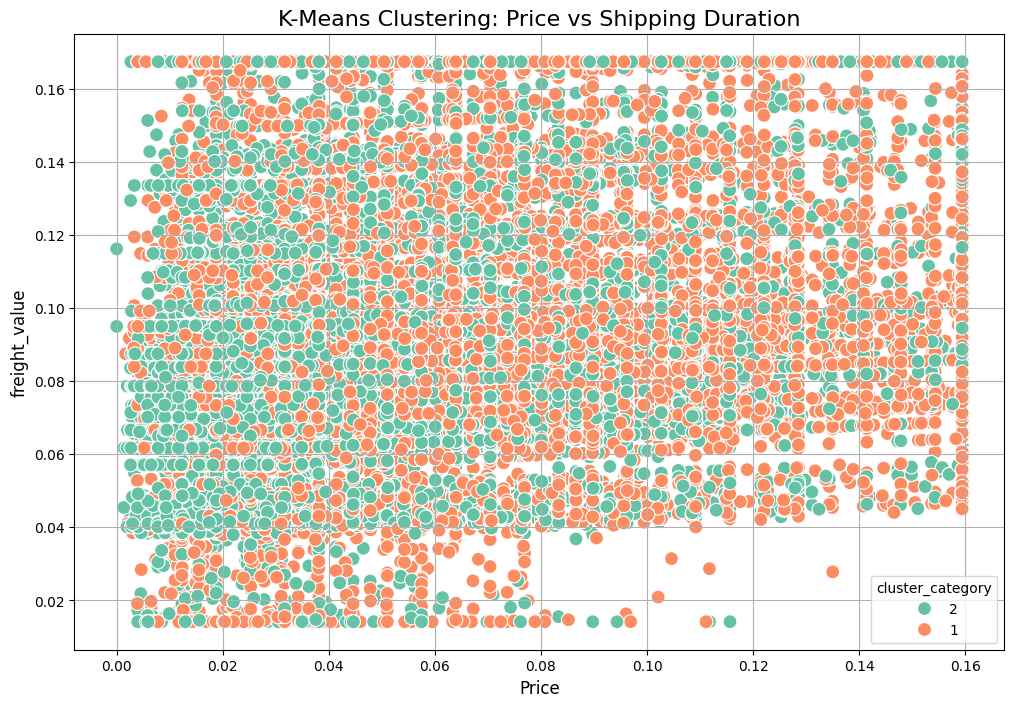

In [41]:
kmeans = KMeans(n_clusters=2, random_state=42)
ecoms_df['cluster_category'] = kmeans.fit_predict(ecoms_df[all_features])
ecoms_df['cluster_category'] = ecoms_df['cluster_category'].map({0: '1', 1: '2'})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=ecoms_df, x='price', y='freight_value', hue='cluster_category', palette='Set2', s=100)
plt.title('K-Means Clustering: Price vs Shipping Duration', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('freight_value', fontsize=12)
plt.legend(title='cluster_category', fontsize=10)
plt.grid(True)
plt.show()

#### Cek distribusi jumlah data di setiap cluster

In [42]:
cluster_counts = ecoms_df['cluster_category'].value_counts()
print("Jumlah data di setiap cluster:")
print(cluster_counts)

Jumlah data di setiap cluster:
cluster_category
1    30508
2    28257
Name: count, dtype: int64


In [43]:
ecoms_df.head(10)

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded,cluster_category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.076074,0.118669,8d5266042046a06655c8db133d120ba5,0.750,perfumery,2018-07,0.025243,0.801347,0.0,1.0,0.004131,0.042601,2,2
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.102670,0.100203,e73b67b67587f7644d5bd1a52deb1b01,1.000,auto,2018-08,0.017476,0.821549,0.0,0.0,0.008035,0.060289,2,1
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.028500,0.141829,359d03e676b3c069f62cadba8dd3f6e8,1.000,pet_shop,2017-11,0.025243,0.813131,0.0,1.0,0.004695,0.122820,2,2
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.038176,0.079078,07d67dd06ed5f88bef11ef6b464e79ae,1.000,auto,2017-05,0.017476,0.811448,0.0,0.0,0.010608,0.243896,2,1
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.012297,0.083668,fc4af8aea8ec3f1a3cd181d3d0cadbd5,0.375,furniture_decor,2017-01,0.017476,0.845118,0.0,1.0,0.010608,0.109118,2,2
5,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,1,08574b074924071f4e201e151b152b4e,0.063358,0.159199,15898b543726a832d4137fbef5d1d00e,0.375,garden_tools,2017-05,0.023301,0.806397,0.0,1.0,0.000763,0.112108,2,2
6,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,1,f7e0fa615b386bc9a8b9eb52bc1fff76,0.062712,0.084085,a932e1fddc0c17fc26de56687b48f922,0.750,computers_accessories,2017-07,0.009709,0.824916,0.0,1.0,0.010044,0.476333,2,2
7,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,1,72a97c271b2e429974398f46b93ae530,0.020043,0.095039,ed220e853e96b629118a3576e02900b6,1.000,perfumery,2018-06,0.023301,0.840067,0.0,1.0,0.003404,0.176383,2,2
8,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,1,10adb53d8faa890ca7c2f0cbcb68d777,0.012297,0.066715,346e42116863ea64d51cef464d8f0c9c,1.000,bed_bath_table,2018-07,0.007767,0.806397,0.0,0.0,0.004507,0.042601,2,1
9,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,1,72d3bf1d3a790f8874096fcf860e3eff,0.024142,0.083981,8f39f09c22b1ceb6e3eb178d8e50bb8a,0.750,toys,2018-03,0.021359,0.806397,0.0,1.0,0.005075,0.090433,2,2


## b. Evaluasi Model Clustering

### 1. Evaluasi dengan Elbow Method.

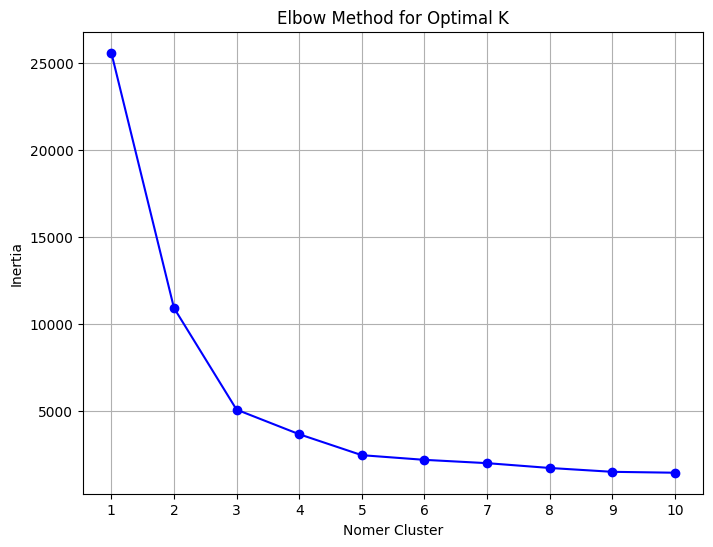

Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: 2


In [44]:
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ecoms_df[all_features])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Nomer Cluster')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

inertia_diff = np.diff(inertia_values)
optimal_k = np.argmin(inertia_diff) + 2

print(f"Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: {optimal_k}")

### 2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [45]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(ecoms_df[all_features])
    score = silhouette_score(ecoms_df[all_features], cluster_labels)
    silhouette_scores.append((k, score))

for k, score in silhouette_scores:
    print(f'k={k}, Silhouette Score={score:.4f}')

k=2, Silhouette Score=0.6558
k=3, Silhouette Score=0.6862
k=4, Silhouette Score=0.6309
k=5, Silhouette Score=0.5877
k=6, Silhouette Score=0.5264
k=7, Silhouette Score=0.5248
k=8, Silhouette Score=0.4647
k=9, Silhouette Score=0.4869
k=10, Silhouette Score=0.4446


Optimal k berdasarkan Silhouette Score: 3


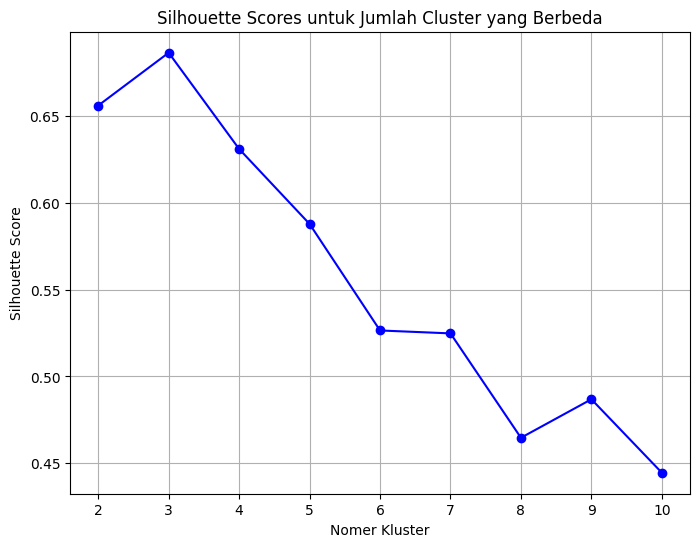

In [46]:
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f'Optimal k berdasarkan Silhouette Score: {optimal_k}')

plt.figure(figsize=(8, 6))
plt.plot([k for k, _ in silhouette_scores], [score for _, score in silhouette_scores], marker='o', color='b')
plt.title('Silhouette Scores untuk Jumlah Cluster yang Berbeda')
plt.xlabel('Nomer Kluster')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

### 3. Evaluasi dari Elbow Method dan Silhouette Score

- Cluster yang pilih untuk penerapan K-Means adalah 2 cluster.

- Berdasarkan Metode Elbow, jumlah cluster yang direkomendasikan adalah 2.

- Hasil dari analisis Silhouette Score menunjukkan bahwa k=2 menghasilkan nilai optimal dengan Silhouette Score = 0.6889, yang menunjukkan pembagian cluster yang baik dan seimbang.

Dengan demikian dapat disimpulkan, jumlah cluster yang cocok dan optimal untuk dataset (ecoms_df) ini adalah K=2 (2 cluster), yang memberikan pembagian cluster yang jelas dan analisis yang lebih akurat.

## c. Visualisasi Hasil Clustering

In [47]:
ecoms_df.head()

,order_id,customer_id,order_status,order_item_id,product_id,price,freight_value,review_id,review_score,product_category_name_english,order_purchase_date,shipping_duration_days,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,product_complexity,order_status_encoded,cluster_category
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,0.076074,0.118669,8d5266042046a06655c8db133d120ba5,0.750,perfumery,2018-07,0.025243,0.801347,0.0,1.0,0.004131,0.042601,2,2
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,0.102670,0.100203,e73b67b67587f7644d5bd1a52deb1b01,1.000,auto,2018-08,0.017476,0.821549,0.0,0.0,0.008035,0.060289,2,1
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,0.028500,0.141829,359d03e676b3c069f62cadba8dd3f6e8,1.000,pet_shop,2017-11,0.025243,0.813131,0.0,1.0,0.004695,0.122820,2,2
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,0.038176,0.079078,07d67dd06ed5f88bef11ef6b464e79ae,1.000,auto,2017-05,0.017476,0.811448,0.0,0.0,0.010608,0.243896,2,1
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,0.012297,0.083668,fc4af8aea8ec3f1a3cd181d3d0cadbd5,0.375,furniture_decor,2017-01,0.017476,0.845118,0.0,1.0,0.010608,0.109118,2,2


### 1. Produk Hemat dan Cepat

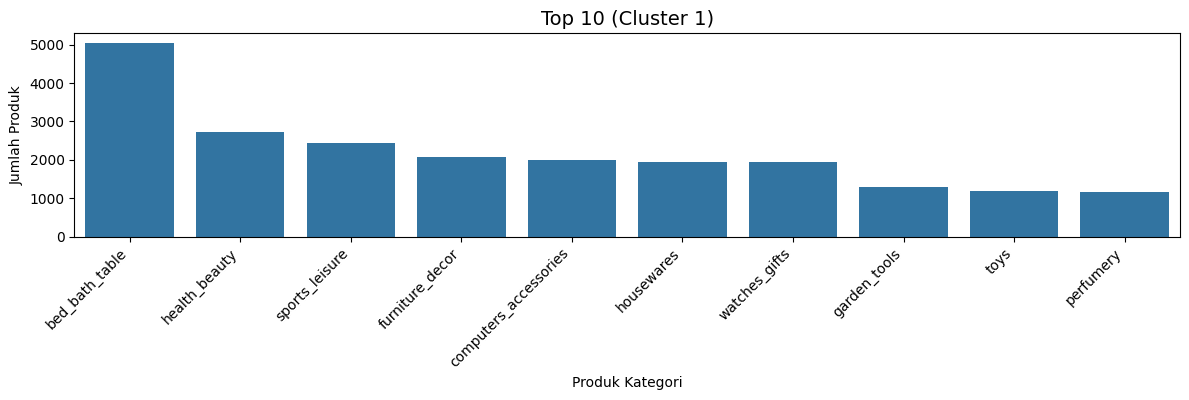

In [48]:
cluster1 = ecoms_df[ecoms_df['cluster_category'] == '1']
top_1 = cluster1['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.barplot(x=top_1.index, y=top_1.values)
plt.title('Top 10 (Cluster 1)', fontsize=14)
plt.xlabel('Produk Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Produk dengan harga terjangkau, pengiriman cepat, dan ukuran kecil, ideal untuk pelanggan yang menginginkan efisiensi biaya dan waktu.

## 2. Produk Berkualitas dengan Harga Terjangkau

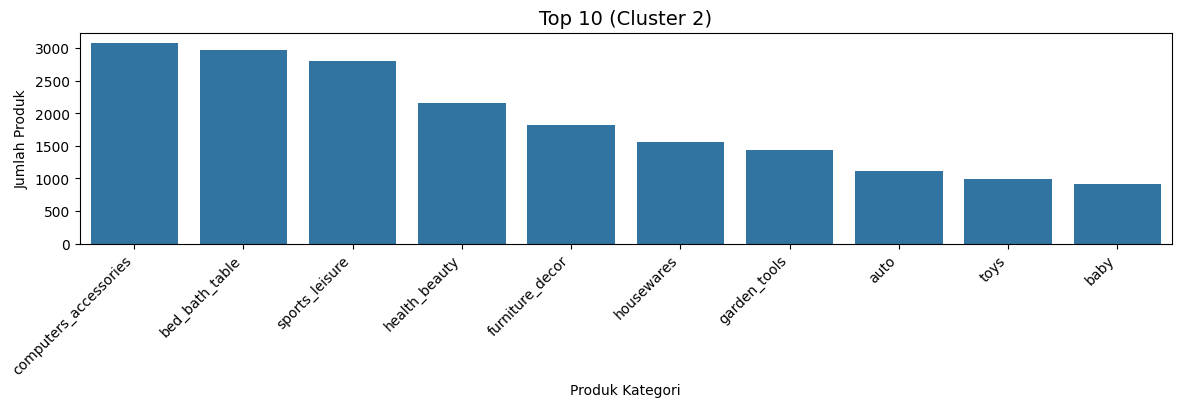

In [49]:
cluster2 = ecoms_df[ecoms_df['cluster_category'] == '2']
top_2 = cluster2['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
sns.barplot(x=top_2.index, y=top_2.values)
plt.title('Top 10 (Cluster 2)', fontsize=14)
plt.xlabel('Produk Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Produk yang menawarkan kualitas sedikit lebih tinggi dengan harga lebih murah, pengiriman cepat, dan transaksi pembayaran yang lebih sering.

## d. Analisis dan Interpretasi Hasil Cluster

In [50]:
cluster_characteristics = ecoms_df.groupby('cluster_category').agg({
    'price': 'mean',
    'freight_value': 'mean',
    'review_score': 'mean',
    'shipping_duration_days': 'mean',
    'product_complexity': 'mean',
    'delivery_accuracy_days': 'mean',
    'review_answer_duration_days': 'mean',
    'payment_made': 'mean',
    'product_volume_cm3': 'mean',
    'order_status_encoded': 'mean'
})

cluster_characteristics

,price,freight_value,review_score,shipping_duration_days,product_complexity,delivery_accuracy_days,review_answer_duration_days,payment_made,product_volume_cm3,order_status_encoded
cluster_category,,,,,,,,,,
1,0.067891,0.098604,0.815807,0.023529,0.182499,0.812624,0.0,0.0,0.003796,2.035991
2,0.048837,0.089622,0.826216,0.022973,0.180615,0.811806,0.0,1.0,0.004291,2.035213


### 1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia.

#### Cluster 1:  (**Produk Hemat dan Cepat**) Produk Ekonomis dengan Pengiriman Cepat

- **Harga (Price):** Produk di cluster ini memiliki harga yang relatif rendah (0.067891), cocok untuk pelanggan yang mencari produk dengan harga terjangkau.

- **Ongkos Kirim (Freight Value):** Ongkos kirim juga rendah (0.098604), menambah daya tarik bagi pelanggan yang ingin menghemat biaya pengiriman.
- **Ulasan Pelanggan (Review Score):** Ulasan pelanggan cukup tinggi (0.815807), menunjukkan bahwa meskipun harga terjangkau, pelanggan umumnya puas dengan kualitas produk.
- **Durasi Pengiriman (Shipping Duration Days):** Pengiriman sangat cepat (0.023529), ideal untuk pelanggan yang mengutamakan kecepatan pengiriman.
- **Kompleksitas Produk (Product Complexity):** Produk di cluster ini cenderung sederhana (0.182499), cocok bagi pelanggan yang mencari barang dengan keterangan langsung dan tidak terlalu rumit.
- **Akurasi Pengiriman (Delivery Accuracy Days):** Pengiriman sering tepat waktu (0.812624), memastikan pengalaman belanja yang lebih memuaskan.
- **Pembayaran (Payment Made):** Tidak ada pembayaran yang tercatat (0.0), menunjukkan bahwa transaksi mungkin dilakukan secara berbeda atau dalam bentuk pesanan yang belum dibayar secara tuntas/full.
- **Volume Produk (Product Volume):** Produk memiliki volume kecil (0.003796), cocok untuk pengiriman cepat dan produk yang mudah ditangani.
- **order_status_encoded**: rata-rata (2.035991), menunjukkan pengiriman produk sebagian besar terkirim. Fokus pada pengiriman cepat dan harga terjangkau.

#### Cluster 2: **(Produk Berkualitas dengan Harga Terjangkau)** Produk Ekonomis dengan Kualitas Lebih Baik dan Pengiriman Cepat

- **Harga (Price):** Produk di cluster ini memiliki harga sedikit lebih rendah (0.048837), yang lebih cocok untuk pelanggan dengan anggaran terbatas namun tetap menginginkan kualitas.

- **Ongkos Kirim (Freight Value):** Ongkos kirim sedikit lebih rendah (0.089622), memberikan nilai lebih untuk pelanggan yang menginginkan biaya total lebih murah.
- **Ulasan Pelanggan (Review Score):** Ulasan pelanggan lebih tinggi (0.826216), menunjukkan bahwa meskipun harga sedikit lebih rendah, pelanggan merasa lebih puas dengan kualitas produk.
- **Durasi Pengiriman (Shipping Duration Days):** Durasi pengiriman sangat cepat (0.022973), memberikan pengalaman belanja yang cepat dan efisien.
- **Kompleksitas Produk (Product Complexity):** Produk di cluster ini juga relatif sederhana (0.180615), sehingga mudah digunakan oleh pelanggan yang mencari barang fungsional.
- **Akurasi Pengiriman (Delivery Accuracy Days):** Pengiriman sangat tepat waktu (0.811806), menjamin produk sampai dengan cepat dan sesuai jadwal.
- **Pembayaran (Payment Made):** Pembayaran tercatat (1.0), menunjukkan bahwa produk ini lebih sering dibeli dan transaksi lebih sering dilakukan.
- **Volume Produk (Product Volume):** Volume produk sedikit lebih besar (0.004291), menandakan bahwa produk ini mungkin sedikit lebih besar atau lebih berat dibandingkan dengan cluster 1.
- **order_status_encoded** rata-rata (2.035213), juga menunjukkan pengiriman terkirim. Produk berkualitas dengan pengiriman tepat waktu.

### 2. Interpretasi hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

#### Cluster 1: Produk Hemat dan Cepat

 -  Produk dengan harga rendah dan pengiriman cepat cocok untuk pelanggan yang sensitif terhadap biaya dan membutuhkan pengiriman yang efisien. Produk ini biasanya digunakan untuk kebutuhan sehari-hari yang tidak memerlukan perhatian khusus.

- Pola yang Dapat Dimanfaatkan:
 - Fokus pada pemasaran produk dengan harga terjangkau dan pengiriman cepat.
 - Pengoptimalan biaya pengiriman dan kerjasama dengan logistik yang efisien akan menarik lebih banyak pelanggan.

  

### Cluster 2: Produk Berkualitas dengan Harga Terjangkau

- Produk ini menawarkan kualitas sedikit lebih tinggi dengan harga tetap terjangkau, menarik bagi pelanggan yang ingin nilai lebih dalam pembelian mereka tanpa mengeluarkan banyak uang.

- Pola yang Dapat Dimanfaatkan:
 - Penekanan pada kualitas dan nilai produk dalam pemasaran akan menarik segmen pelanggan yang mencari produk lebih unggul.
 - Strategi untuk meningkatkan ulasan positif dan mendorong pembelian berulang dapat meningkatkan daya tarik produk.


#### Rekomendasi Bisnis

##### Cluster 1: **Produk Hemat dan Cepat** Untuk produk dengan harga rendah dan pengiriman cepat, strategi utama:
 - Fokus pada promosi harga terjangkau dan pengiriman yang efisien untuk menarik pelanggan yang sensitif terhadap biaya dan membutuhkan pengiriman cepat.
 - Optimalkan biaya pengiriman dan kerjasama dengan logistik yang efisien untuk memastikan kepuasan pelanggan.

##### Cluster 2: **Produk Berkualitas dengan Harga Terjangkau** Untuk produk dengan kualitas lebih tinggi namun tetap terjangkau, strategi yang dapat diterapkan:
 - Menjaga kualitas produk dan menyoroti keunggulan dalam pemasaran untuk menarik pelanggan yang mencari produk berkualitas dengan harga wajar.
 - Fokus pada ulasan positif dan meningkatkan loyalitas pelanggan dengan program loyalitas atau insentif pembelian ulang.
 - Pertahankan pengiriman tepat waktu dan soroti kualitas produk untuk meningkatkan loyalitas pelanggan.

# 7. Mengeksport Data

Hasil Akhir Data Clustering Disimpan Pada File hasil_clustering.csv yang kedepannya digunakan untuk memprediksi produk mana yang unggul kedepannya.

In [51]:
ecoms_df.to_csv('hasil_clustering.csv', index=False)
print("Data berhasil disimpan dalam file hasil_clustering.csv")

Data berhasil disimpan dalam file hasil_clustering.csv
